# Вступ в машинне навчання для Інтелектуального Аналізу Даних

Машинне навчання є на даний момент швидкозростаючою галуззю, хоча слід підкреслити, що початкові методи, які ми тут розглянемо (а саме лінійна регресія), з'явилися приблизно на 200 років раніше, ніж сам термін (зазвичай вважається, що Гаусс розробив метод найменших квадратів близько 1800 року). Більшість пізніших методів, про які ми говоримо, були добре вивчені в статистиці на початку століття. Ми все одно будемо використовувати загальний термін «машинне навчання» для позначення всіх цих методів, але важливо знати, що ці ідеї не виникли в спільноті ML. Натомість тема машинного навчання розвинулася завдяки поєднанню трьох різних елементів: 
- зростання обчислювальної потужності (машинне навчання, яке виникло з інформатики, завжди було фундаментально пов'язане з обчислювальними алгоритмами), 
- величезні обсяги доступних даних (сировина для методів машинного навчання) та 
- деякі значні досягнення в галузі алгоритмів, що відбулися за останні 30 років. Однак для початку ми розглянемо деякі з найпростіших алгоритмів, щоб систематизувати основні принципи.


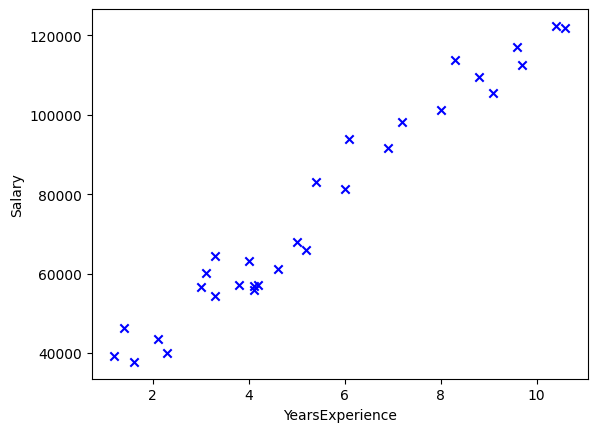

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt
    # plt.show()

# build_plot('../resources/telecom_cus.csv', 'age', 'income')
# build_plot('../resources/china_gdp.csv', 'Year', 'Value')
# build_plot('../resources/cust_segmentation_Data.csv', 'Income', 'Other Debt') 
# build_plot('../resources/heart.csv', 'chol', 'trtbps')
# build_plot('../resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions')

build_plot('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary').show()

**Простий приклад**

Ось простий приклад залежності між стажем роботи співробітників та їхньою заробітною платою. Чи можна передбачити другий параметр на основі значення першого?

Можна припустити, що залежність відповідає лінійній моделі.

$$y \approx \theta_1 \cdot x + \theta_2$$


Тут 
- $\theta_1$ це “нахил” лінії, та (slope)
- $\theta_2$ зсув. (intercept)

Чи можемо ми робити передбачення даних?

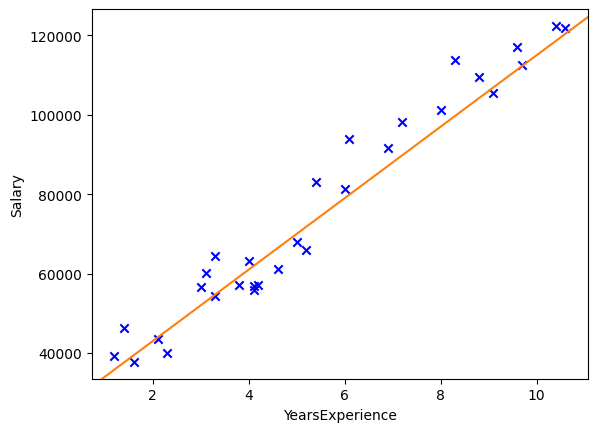

In [3]:
import numpy as np

def build_line(plt, theta):
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)

plt = build_plot('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
build_line(plt, np.array([9000, 25000]))

## Градієнтний спуск (Gradient descent)

Припустимо, що прогнозована зарплата відповідає лінійній моделі. Як ми можемо знайти $\theta$? 

Є багато можливостей, але природною метою є мінімізація деякої різниці між цією лінією 
і спостережуваними даними, наприклад, квадратична втрата:

$$E(\theta) = \sum_{i}(\theta_{1}*x_{i} + \theta_{2} - y_{i} )^{2}$$

Тепер нам потрібно знайти параметри, які мінімізують значення функції $E(\theta)$.

$$minimize_{\theta}E(\theta)$$

Найкращий спосіб знайти значення функції $f(x)$, в якій її значення є мінімальним, — це знайти похідну. Ми починаємо з деякої точки і змінюємо вхідне значення в напрямку від'ємної похідної. У випадку багатозмінних функцій ми будемо використовувати часткові похідні.

Щоб знайти хороше значення $\theta$, ми можемо повторно робити кроки в напрямку 
негативних похідних для кожного значення. Ітерація:

$$ \theta_{1} := \theta_{1} - \alpha \frac{\delta}{\delta \theta_{1}} E(\theta_{1}, \theta_{2})$$

$$ \theta_{2} := \theta_{2} - \alpha \frac{\delta}{\delta \theta_{2}} E(\theta_{1}, \theta_{2})$$

де $\alpha$ — це невелике додатне число, яке називається розміром кроку.
Це алгоритм градієнтного спуску, основа сучасного машинного навчання.

Тут: 

$$\frac{\delta}{\delta \theta_{1}} E(\theta_{1}, \theta_{2}) = \sum_{i}2(\theta_{1}*x_{i} + \theta_{2} - y_{i} )*x_{i}$$

$$\frac{\delta}{\delta \theta_{2}} E(\theta_{1}, \theta_{2}) = \sum_{i}2(\theta_{1}*x_{i} + \theta_{2} - y_{i} )$$


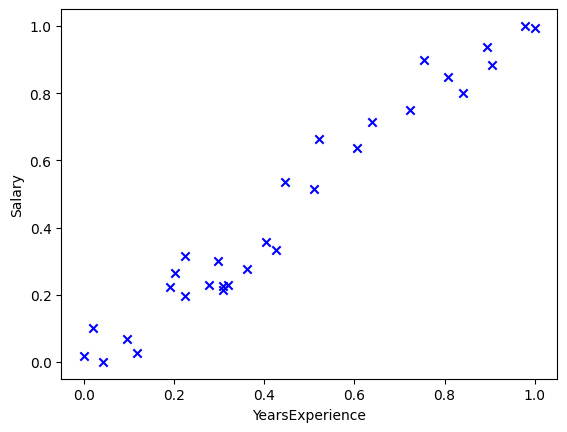

In [4]:
# do not forget to first normalize the data:

def build_plot_normalized(file_path, x, y):
    data = pd.read_csv(file_path)
    x_nor = (data[x] - min(data[x])) / (max(data[x]) - min(data[x]))
    y_nor = (data[y] - min(data[y])) / (max(data[y]) - min(data[y]))
    plt.scatter(x_nor, y_nor, c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot_normalized('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary').show()

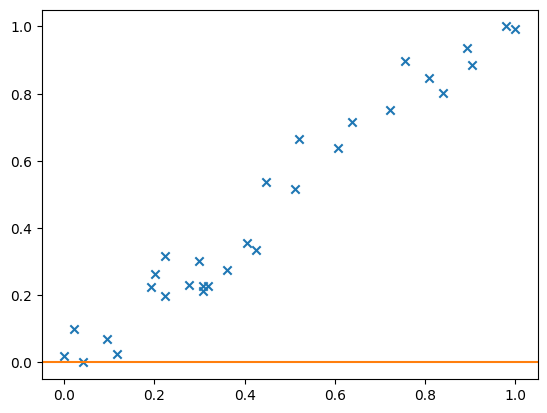

In [5]:
# Visualizing the gradient descent:

def get_data(file_path, x_name, y_name):
    data = pd.read_csv(file_path)
    return data[x_name], data[y_name]

def normalize_data(x):
    x_normalized = (x - min(x)) / (max(x) - min(x))
    return x_normalized

def gradient_descent(x, y, iters, alpha):
    theta = np.array([0., 0.])
    for t in range(iters):
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return theta 

def plot_fit(x, y, theta):
    plt.scatter(x, y, marker = 'x')
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim) 

x, y = get_data('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
x_normalized, y_normalized = normalize_data(x), normalize_data(y)

#first iteration
theta = gradient_descent(x_normalized, y_normalized, 0, 0.1)
plot_fit(x_normalized, y_normalized, theta)

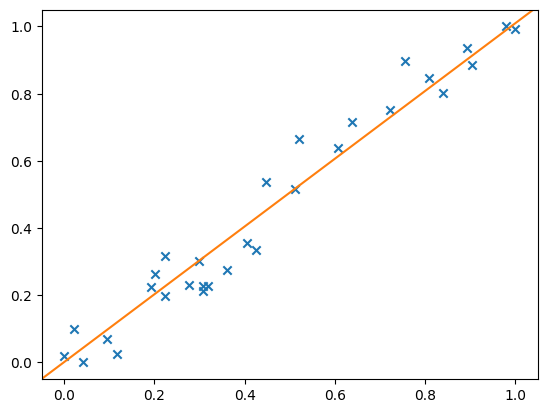

In [11]:
theta = gradient_descent(x_normalized, y_normalized, 200, 0.1) # change third parameter to see more iterations
plot_fit(x_normalized, y_normalized, theta)

Text(0, 0.5, 'theta2')

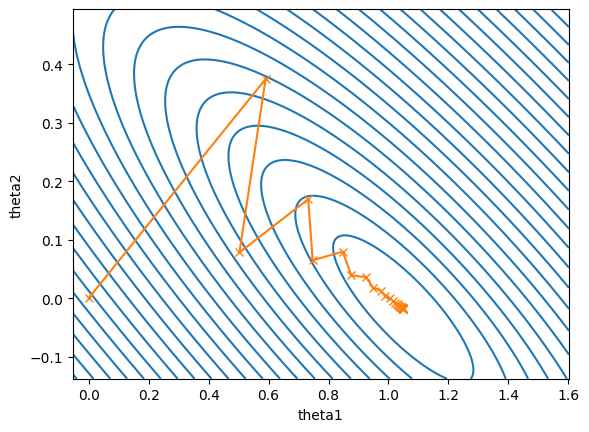

In [12]:
# Visualizing parameter updates

def gradient_descent_params(x, y, iters):
    thetas = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        thetas.append(theta.copy())
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return np.array(thetas)

def err(x, y, theta):
    return np.mean((np.outer(x, theta[:,0]) + theta[:,1] - y[:,None])**2,axis=0)

thetas = gradient_descent_params(x_normalized, y_normalized, 100)
plt.plot(thetas[:,0], thetas[:,1])
xlim, ylim =(np.array(plt.gca().get_xlim()), np.array(plt.gca().get_ylim()))
xlim += np.array([0,0.5])
ylim += np.array([-0.1, 0.1])

XX,YY = np.meshgrid(np.linspace(xlim[0],xlim[1],200), np.linspace(ylim[0], ylim[1],200))
ZZ = err(x_normalized.to_numpy(), y_normalized.to_numpy(), np.hstack([np.ravel(XX)[:,None], np.ravel(YY)[:,None]])).reshape(XX.shape)
#V = np.logspace(np.log(np.min(ZZ)), np.log(np.max(ZZ)), 30)
V = np.linspace(np.sqrt(np.min(ZZ)), np.sqrt(np.max(ZZ)), 25)**2
plt.clf()
plt.contour(XX,YY,ZZ, V, colors=('C0',))
plt.plot(thetas[:,0], thetas[:,1], 'C1-x')
plt.xlabel("theta1")
plt.ylabel("theta2")

![graph](../resources/ml-1.webp)

![graph](../resources/ml-1.png)

Машинне навчання надає можливість автоматично встановлювати 
прогнозну модель на основі даних

### Термінологія

Функція втрат: $l: y × y → R$, вимірює різницю між прогнозом і 
фактичним результатом $$l(y',y)=(y'-y)^{2}$$

Канонічна задача оптимізації машинного навчання:
$$minimize_{\theta}\sum_{i}l(h_{\theta}(x^{i}), y^{i})$$
Практично кожен алгоритм машинного навчання має таку форму, просто вкажіть
- Що таке функція гіпотези?
- Що таке функція втрат?
- Як вирішити задачу оптимізації?

### Приклади алгоритмів машинного навчання

Примітка: ми не дотримувалися єдиних правил 
називання, багато алгоритмів машинного навчання фактично визначають лише деякі з цих 
трьох елементів

- Найменші квадрати: {лінійна гіпотеза, квадратична втрата, (зазвичай) аналітичне 
рішення}
- Лінійна регресія: {лінійна гіпотеза, *, *}
- Машина опорних векторів (support vector machine): {лінійна або ядрова гіпотеза, втрата шарніра, *}
- Нейронна мережа: {складена нелінійна функція, *, (зазвичай) градієнтний 
спуск)
- Дерево рішень (decision trees): {ієрархічні півплощини, вирівняні по осі, *, жадібна оптимізація}
- Наївний Байєс: {лінійна гіпотеза, спільна ймовірність за певних 
припущень незалежності, аналітичне рішення}

**Використання scikit-learn**

slope: 9449.962321455074 intercept: 24848.203966523208


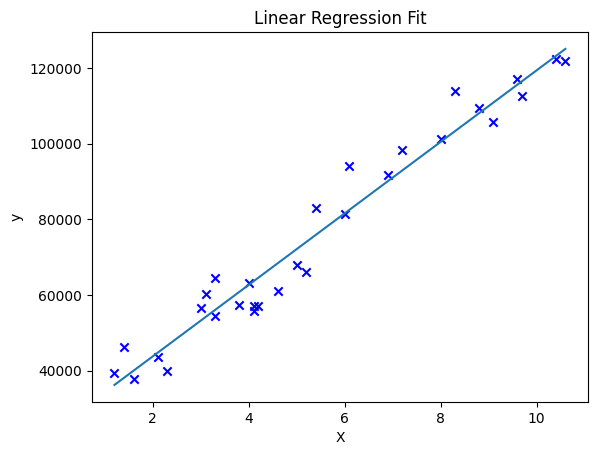

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('../resources/Salary_dataset.csv')
X = np.array(data['YearsExperience']).reshape(-1, 1)  
y = np.array(data['Salary'])                

# train model 
model = LinearRegression()
model.fit(X, y)

# retrieve parameters
slope = model.coef_[0]       # theta_1
intercept = model.intercept_ # theta_2 -> interpretability 
print("slope:", slope, "intercept:", intercept)

# build regression line for plotting 
# make fine grid for nice straight line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# plot 
plt.scatter(X, y, c='blue', marker='x')          # original points
plt.plot(X_line, y_line)   # fitted line
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()